In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Variables

In [ ]:
# input variables: Youssef
Bp = ctrl.Antecedent(universe = np.arange(80, 180, 1), label = 'Bp')
temperature = ctrl.Antecedent(universe = np.arange(98, 106, 1), label = 'temperature')

# output variables: Diaa
health_cond = ctrl.Consequent(universe=np.arange(0,1,0.1), label='health condition', defuzzify_method='centroid')

## Subsets & Membership functions

In [ ]:
# input variables: Youssef
Bp['normal'] = fuzz.trimf(Bp.universe, [80, 100, 120])
Bp['pre hypertension'] = fuzz.trimf(Bp.universe, [90, 115, 140])
Bp['high stage1'] = fuzz.trimf(Bp.universe, [100, 130, 160])
Bp['high stage2'] = fuzz.trimf(Bp.universe, [110, 140, 170])
Bp['emergency'] = fuzz.trimf(Bp.universe, [130, 155, 180])

temperature['low'] = fuzz.trimf(temperature.universe, [98, 98, 100])
temperature['normal'] = fuzz.trimf(temperature.universe, [98, 100, 102])
temperature['high1'] = fuzz.trimf(temperature.universe, [100, 102, 104])
temperature['high2'] = fuzz.trimf(temperature.universe, [102, 104, 106])
temperature['emergency'] = fuzz.trimf(temperature.universe, [104, 106, 106])


# output variables: Diaa
health_cond['worst'] = fuzz.trimf(health_cond.universe, [0.7,0.85,1.0])
health_cond['normal'] = fuzz.trimf(health_cond.universe, [0.4,0.6,0.8])
health_cond['good'] = fuzz.trimf(health_cond.universe, [0.0,0.25,0.5])


## Variables

## Subsets & Membership functions

c:\Users\diaal\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


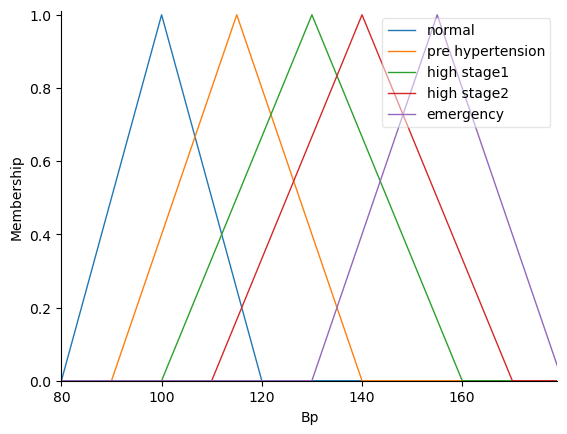

In [4]:
Bp.view()

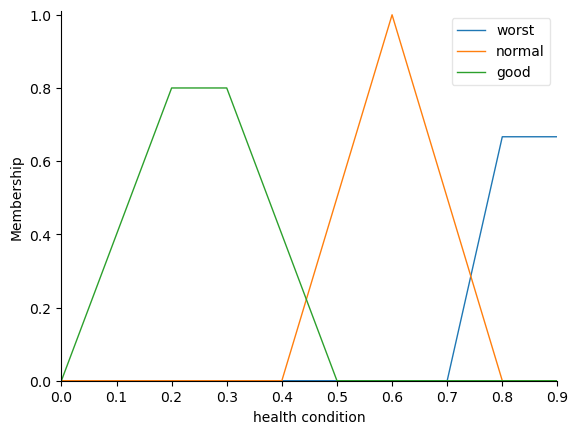

In [6]:
health_cond.view() # Diaa

In [7]:
# Mohab & Omar
rule1=ctrl.Rule(Bp['normal'] & temperature['low'],health_cond['good'])
rule2=ctrl.Rule(Bp['normal'] & temperature['normal'],health_cond['normal'])
rule3=ctrl.Rule(Bp['normal'] & temperature['high1'],health_cond['normal'])
rule4=ctrl.Rule(Bp['normal'] & temperature['high2'],health_cond['worst'])
rule5=ctrl.Rule(Bp['normal'] & temperature['emergency'],health_cond['worst'])

rule6=ctrl.Rule(Bp['pre hypertension'] & temperature['low'],health_cond['good'])
rule7=ctrl.Rule(Bp['pre hypertension'] & temperature['normal'],health_cond['normal'])
rule8=ctrl.Rule(Bp['pre hypertension'] & temperature['high1'],health_cond['worst'])
rule9=ctrl.Rule(Bp['pre hypertension'] & temperature['high2'],health_cond['worst'])
rule10=ctrl.Rule(Bp['pre hypertension'] &temperature['emergency'],health_cond['worst'])

rule11=ctrl.Rule(Bp['high stage1'] & temperature['low'],health_cond['normal'])
rule12=ctrl.Rule(Bp['high stage1'] & temperature['normal'],health_cond['worst'])
rule13=ctrl.Rule(Bp['high stage1'] & temperature['high1'],health_cond['worst'])
rule14=ctrl.Rule(Bp['high stage1'] & temperature['high2'],health_cond['worst'])
rule15=ctrl.Rule(Bp['high stage1'] & temperature['emergency'],health_cond['worst'])

rule16=ctrl.Rule(Bp['high stage2'] & temperature['low'],health_cond['worst'])
rule17=ctrl.Rule(Bp['high stage2'] & temperature['normal'],health_cond['worst'])
rule18=ctrl.Rule(Bp['high stage2'] & temperature['high1'],health_cond['worst'])
rule19=ctrl.Rule(Bp['high stage2'] & temperature['high2'],health_cond['worst'])
rule20=ctrl.Rule(Bp['high stage2'] & temperature['emergency'],health_cond['worst'])

rule21=ctrl.Rule(Bp['emergency'] & temperature['low'],health_cond['worst'])
rule22=ctrl.Rule(Bp['emergency'] & temperature['normal'],health_cond['worst'])
rule23=ctrl.Rule(Bp['emergency'] & temperature['high1'],health_cond['worst'])
rule24=ctrl.Rule(Bp['emergency'] & temperature['high2'],health_cond['worst'])
rule25=ctrl.Rule(Bp['emergency'] & temperature['emergency'],health_cond['worst'])

## Control system creation & simulation

In [8]:
# Mahmoud
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                 rule6,rule7,rule8,rule9,rule10,
                                 rule11,rule12,rule13,rule14,rule15,
                                 rule16,rule17,rule18,rule19,rule20,
                                 rule21,rule22,rule23,rule24,rule25])
health = ctrl.ControlSystemSimulation(control_sys)

## Testing

In [9]:
health.input['Bp'] = 110
health.input['temperature'] = 101
health.compute()
print(health.output['health condition'])

0.674074074074074
